<a href="https://colab.research.google.com/github/SauloHenriqueAguiar/AnalisedosDadosPH/blob/main/AnalisedosDadosSensorPH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analise  dos Dados 

In [85]:
import pandas as pd 
read_file = pd.read_excel ("/content/dados calibração esp32 PH solo.xlsx")

In [86]:
read_file.to_csv ("/content/dados calibração esp32 PH solo.csv",  
                  index = None, 
                  header=True)

In [87]:
df = pd.DataFrame(pd.read_csv("/content/dados calibração esp32 PH solo.csv"))


In [88]:
df

,nº,pH_Meio_Aquoso,pH_Medida_Direta_Akso,Valores_Analogicos_Sensor_pH
0,1,5.1,6.43,711.00
1,2,4.5,5.84,724.00
2,3,7.0,7.80,601.00
3,4,4.2,4.41,763.50
4,5,6.1,6.43,645.25
...,...,...,...,...
73,74,7.5,6.73,644.10
74,75,7.0,6.97,609.40
75,76,7.3,7.51,578.80
76,77,6.1,6.71,650.50


In [89]:
#excuindo coluna de indice
del df['nº']

In [90]:
#dataset
df

,pH_Meio_Aquoso,pH_Medida_Direta_Akso,Valores_Analogicos_Sensor_pH
0,5.1,6.43,711.00
1,4.5,5.84,724.00
2,7.0,7.80,601.00
3,4.2,4.41,763.50
4,6.1,6.43,645.25
...,...,...,...
73,7.5,6.73,644.10
74,7.0,6.97,609.40
75,7.3,7.51,578.80
76,6.1,6.71,650.50


In [91]:
# Verificar tipos de dados, quantidades e valores null:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   pH_Meio_Aquoso                78 non-null     float64
 1   pH_Medida_Direta_Akso         78 non-null     float64
 2   Valores_Analogicos_Sensor_pH  78 non-null     float64
dtypes: float64(3)
memory usage: 2.0 KB


In [92]:
# Verificar valores faltosos:
pd.options.mode.use_inf_as_na = True
df.isnull().sum()

pH_Meio_Aquoso                  0
pH_Medida_Direta_Akso           0
Valores_Analogicos_Sensor_pH    0
dtype: int64

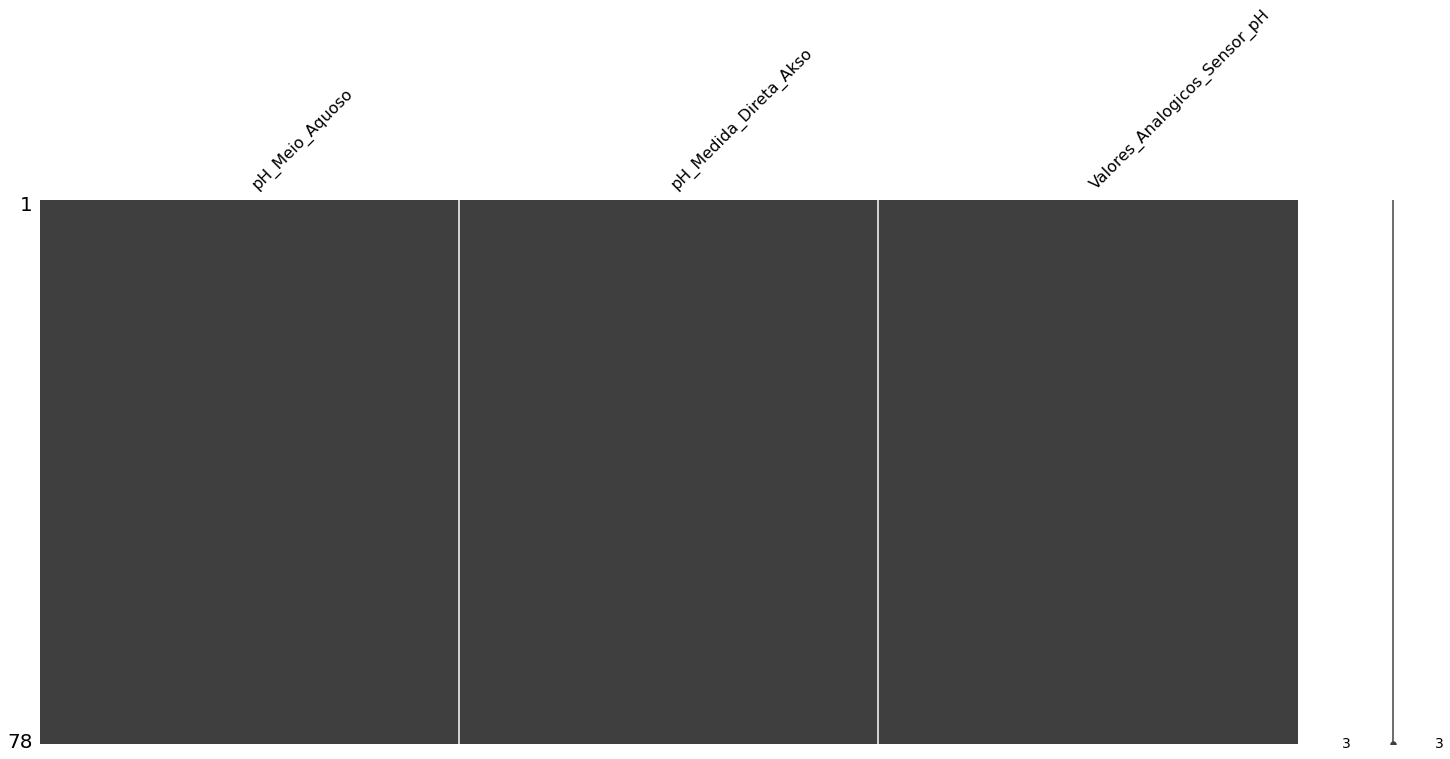

In [93]:
#verificar Missing Values
import missingno as msno
msno.matrix(df)

In [94]:
#descrição estatistica
df.describe(include='all')

,pH_Meio_Aquoso,pH_Medida_Direta_Akso,Valores_Analogicos_Sensor_pH
count,78.00000,78.000000,78.000000
mean,6.29500,6.461795,648.244487
std,1.15893,1.030649,62.386971
min,4.10000,4.280000,468.250000
25%,5.25000,5.740000,606.675000
50%,6.45000,6.675000,644.675000
75%,7.20000,7.245000,698.332500
max,8.80000,8.190000,787.500000


#Outleires 

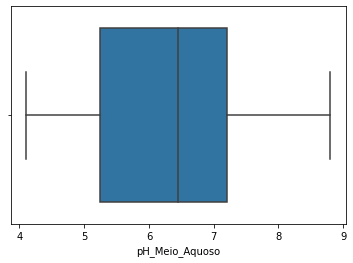

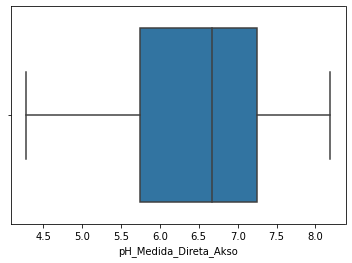

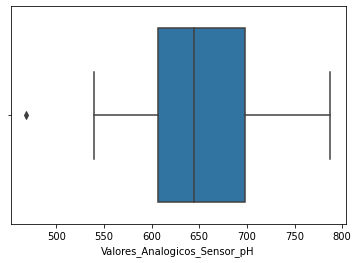

In [95]:
#Verificar Outliers
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import seaborn as sns
for feature in ['pH_Meio_Aquoso', 'pH_Medida_Direta_Akso', 'Valores_Analogicos_Sensor_pH']:
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.boxplot(df[feature])

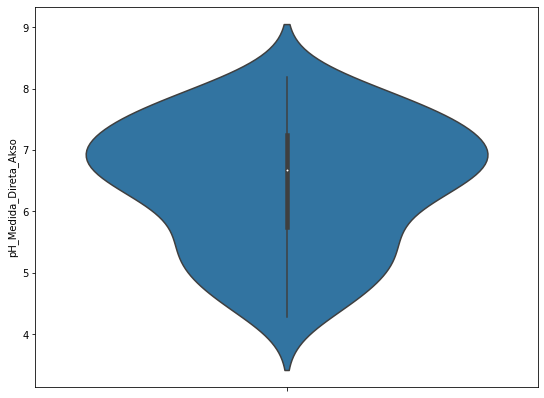

In [96]:
#violinplot valores de pH medição direta
from matplotlib import pyplot 
fig, ax = pyplot.subplots(figsize =(9, 7)) 
sns.violinplot( ax = ax, y = df["pH_Medida_Direta_Akso"] ) 



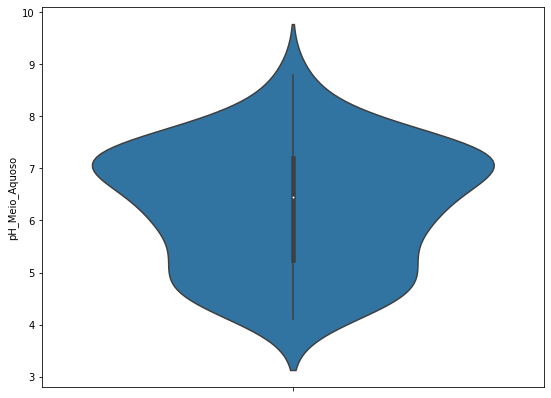

In [97]:
#violinplot valores de pH medição em meio aquoso 
from matplotlib import pyplot 
fig, ax = pyplot.subplots(figsize =(9, 7)) 
sns.violinplot( ax = ax, y = df["pH_Meio_Aquoso"] ) 


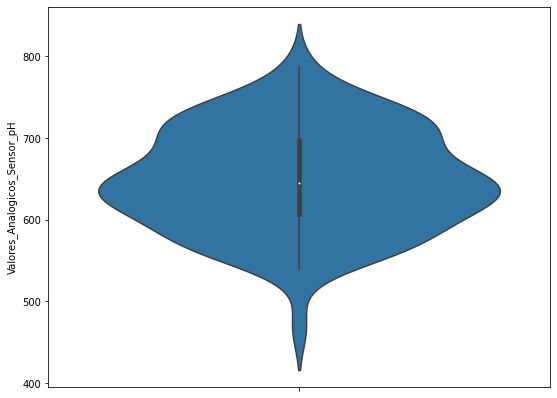

In [98]:
#violinplot valores analogicos medidos com sensor na ESP32 
from matplotlib import pyplot 
fig, ax = pyplot.subplots(figsize =(9, 7)) 
sns.violinplot( ax = ax, y = df["Valores_Analogicos_Sensor_pH"] ) 


Text(0.5, 1.0, 'Relação Valores medição sensor pH desenvolvido x pH meio aquoso')

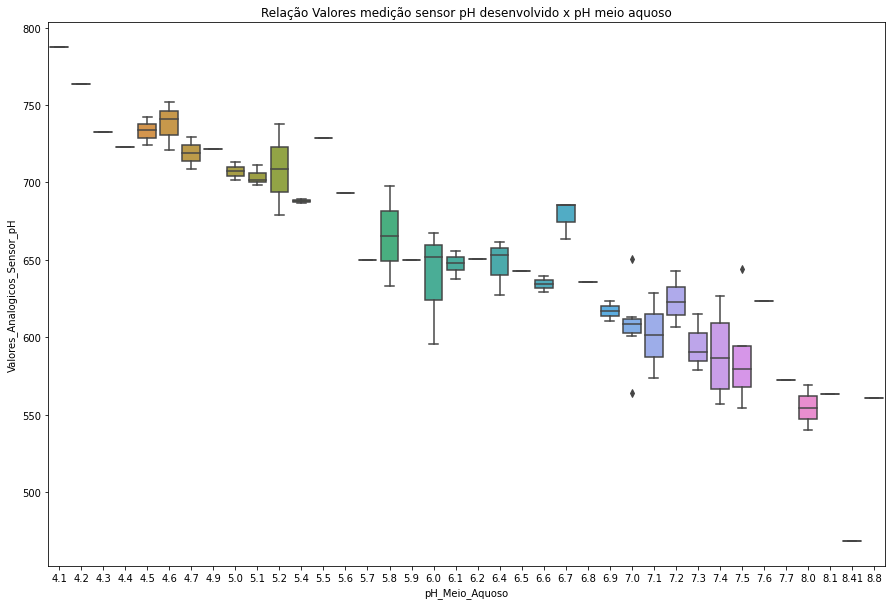

In [99]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df,x='pH_Meio_Aquoso',y='Valores_Analogicos_Sensor_pH')
plt.title('Relação Valores medição sensor pH desenvolvido x pH meio aquoso')

Text(0.5, 1.0, 'Relação Valores medição sensor desenvolvido x pH medição direta(akso)')

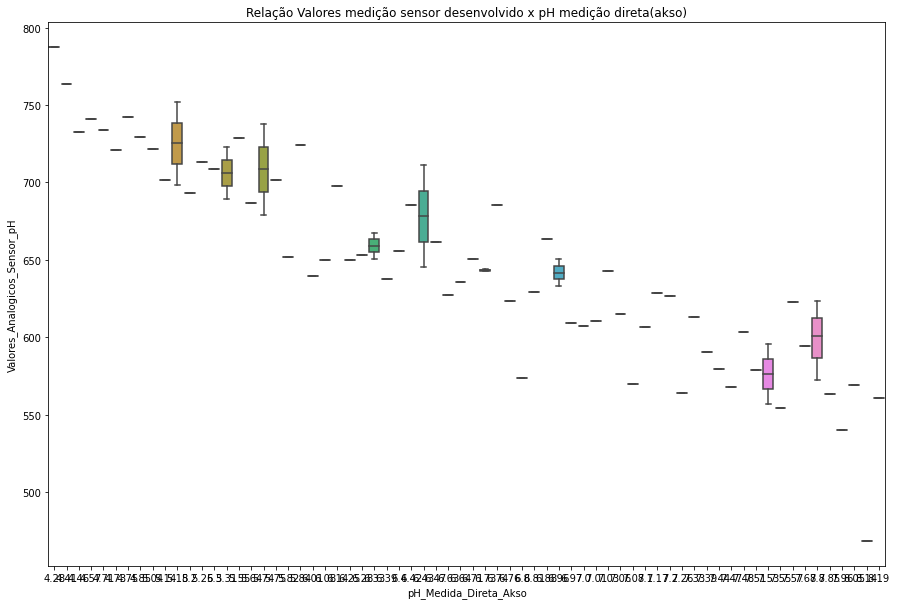

In [100]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df,x='pH_Medida_Direta_Akso',y='Valores_Analogicos_Sensor_pH')
plt.title('Relação Valores medição sensor desenvolvido x pH medição direta(akso)')

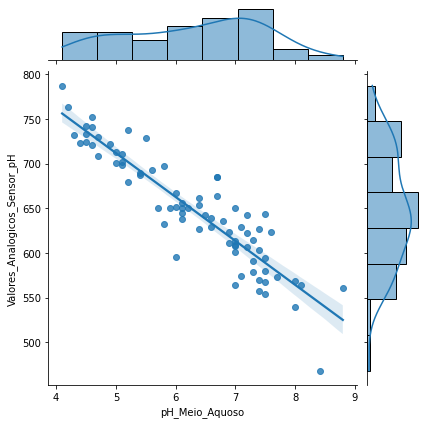

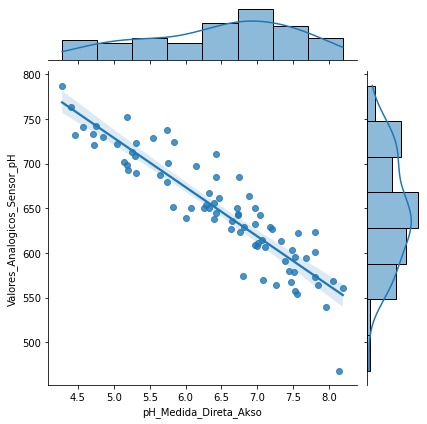

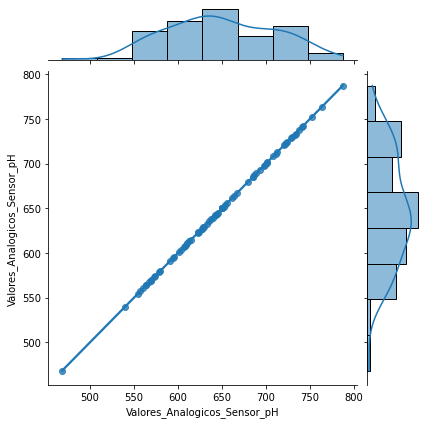

In [101]:
from seaborn import jointplot
for feature in ['pH_Meio_Aquoso', 'pH_Medida_Direta_Akso', 'Valores_Analogicos_Sensor_pH']:
  p = jointplot(feature, "Valores_Analogicos_Sensor_pH", data=df, kind="reg")

#Analise da Normalidade
Teste de Normalidade dos Dados

Aplicou-se o teste Shapiro-Wilk:

Ho= distribuição normal: p-value> 0.05.

Ha = distribuição não normal : p-value <= 0,05

In [102]:
import scipy.stats as stats
import pylab
def teste_shapiro(data):
  shapiro_stat, shapiro_p_valor=stats.shapiro(data)
  print('O valor da estatistica de Shapiro-Wilk =%.3f, O valor de p de Shapiro-Wilk=%.3f' % (shapiro_stat, shapiro_p_valor))
  alpha = 0.05
  return shapiro_p_valor > alpha

for columns in list(df.keys()):
   print(f'\n** {columns} **')
   nenhum_rejeita = True
   for feature in ['pH_Meio_Aquoso', 'pH_Medida_Direta_Akso', 'Valores_Analogicos_Sensor_pH']:
    print(f'- Métrica: {feature}')
    if teste_shapiro(df[feature]):
      print(f'Segue uma distribuição Normal(não rejeita H0)')
      nenhum_rejeita = False
    if nenhum_rejeita: print('Não segue uma distribuição Normal (rejeita H0)')



** pH_Meio_Aquoso **
- Métrica: pH_Meio_Aquoso
O valor da estatistica de Shapiro-Wilk =0.960, O valor de p de Shapiro-Wilk=0.014
Não segue uma distribuição Normal (rejeita H0)
- Métrica: pH_Medida_Direta_Akso
O valor da estatistica de Shapiro-Wilk =0.959, O valor de p de Shapiro-Wilk=0.014
Não segue uma distribuição Normal (rejeita H0)
- Métrica: Valores_Analogicos_Sensor_pH
O valor da estatistica de Shapiro-Wilk =0.983, O valor de p de Shapiro-Wilk=0.410
Segue uma distribuição Normal(não rejeita H0)

** pH_Medida_Direta_Akso **
- Métrica: pH_Meio_Aquoso
O valor da estatistica de Shapiro-Wilk =0.960, O valor de p de Shapiro-Wilk=0.014
Não segue uma distribuição Normal (rejeita H0)
- Métrica: pH_Medida_Direta_Akso
O valor da estatistica de Shapiro-Wilk =0.959, O valor de p de Shapiro-Wilk=0.014
Não segue uma distribuição Normal (rejeita H0)
- Métrica: Valores_Analogicos_Sensor_pH
O valor da estatistica de Shapiro-Wilk =0.983, O valor de p de Shapiro-Wilk=0.410
Segue uma distribuição No

In [103]:
valoresphmedidos =df[['pH_Meio_Aquoso', 'pH_Medida_Direta_Akso', 'Valores_Analogicos_Sensor_pH']]

In [104]:
valoresphmedidos

,pH_Meio_Aquoso,pH_Medida_Direta_Akso,Valores_Analogicos_Sensor_pH
0,5.1,6.43,711.00
1,4.5,5.84,724.00
2,7.0,7.80,601.00
3,4.2,4.41,763.50
4,6.1,6.43,645.25
...,...,...,...
73,7.5,6.73,644.10
74,7.0,6.97,609.40
75,7.3,7.51,578.80
76,6.1,6.71,650.50


In [105]:
#pH medição meio aquoso
stats.shapiro(valoresphmedidos.pH_Meio_Aquoso)

(0.9595735669136047, 0.014347684569656849)

p < 0.05 então nao segue distribuição normal

In [106]:
#pH medição direta no solo(akso)
stats.shapiro(valoresphmedidos.pH_Medida_Direta_Akso)

(0.9591991901397705, 0.013628555461764336)

p < 0.05 então nao segue distribuição normal

In [107]:
#valores analogicos sensor de pH
stats.shapiro(valoresphmedidos.Valores_Analogicos_Sensor_pH)

(0.9834951162338257, 0.4099825322628021)

p > 0.05 então segue distribuição normal

- Variável Correspondente: pH_Meio_Aquoso


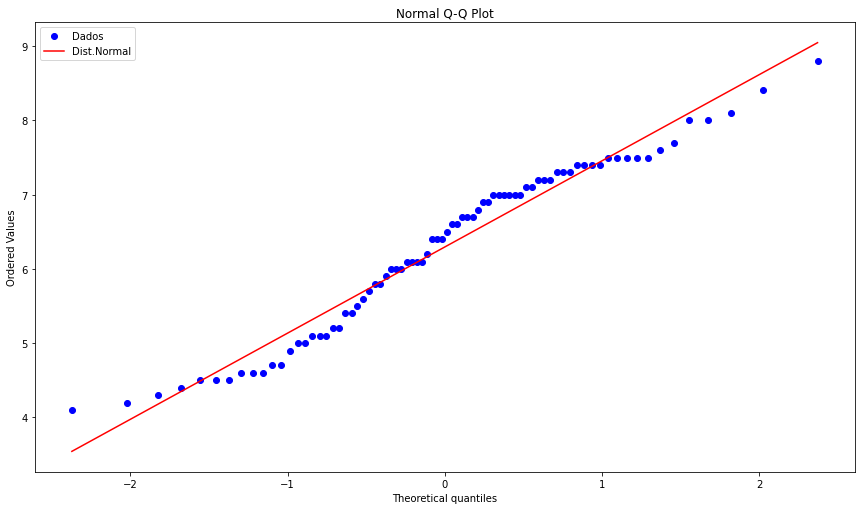

- Variável Correspondente: pH_Medida_Direta_Akso


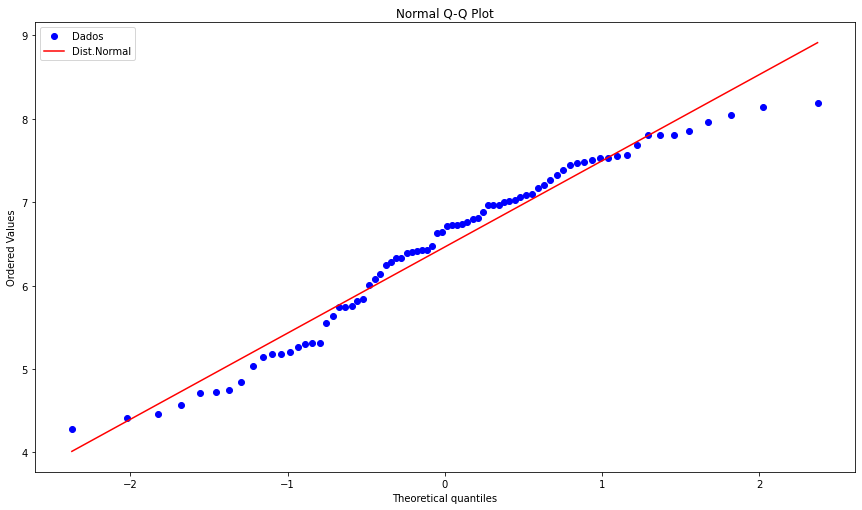

- Variável Correspondente: Valores_Analogicos_Sensor_pH


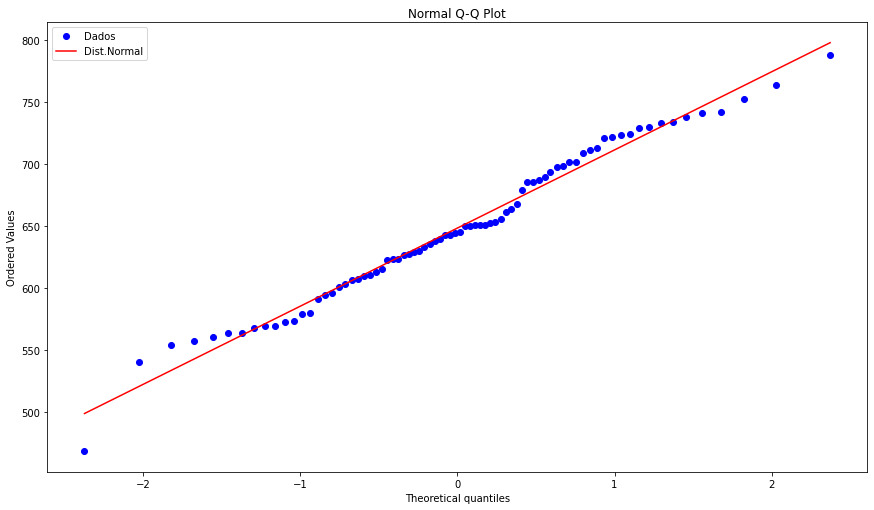

In [108]:
for feature in ['pH_Meio_Aquoso', 'pH_Medida_Direta_Akso', 'Valores_Analogicos_Sensor_pH']:
    stats.probplot(df[feature], dist="norm", plot=pylab)
    print(f'- Variável Correspondente: {feature}')
    pylab.title("Normal Q-Q Plot")
    pylab.legend(['Dados','Dist.Normal'],loc='upper left')
    pylab.show()

#Correlação de Pearson
coeficiente de Pearson é a medida estatística mais usada para obter a associação entre duas variáveis linearmente relacionadas

In [109]:
correlation = df.corr()


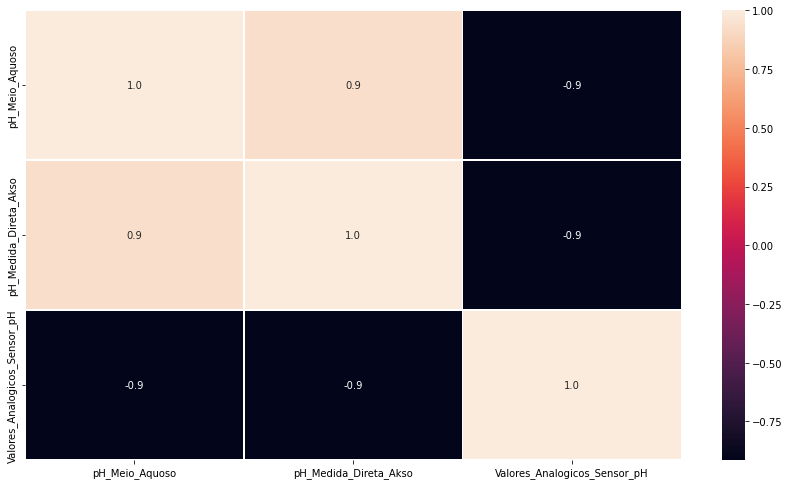

In [110]:
# plot da matriz de correlação
import seaborn as sn
plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

**Correlação entre pH(medição meio aquoso) x Valores analogicos do sensor**

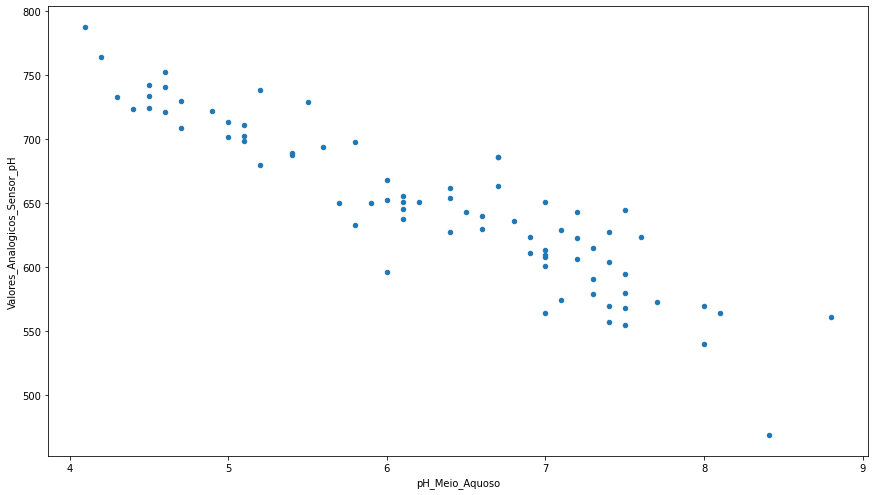

In [111]:
df.plot.scatter(x='pH_Meio_Aquoso',y='Valores_Analogicos_Sensor_pH');



In [112]:
import pandas as pd
from scipy.stats import pearsonr
import numpy as np


In [113]:
#Calculando o teste de correlação de Pearson entre pH meio aquoso x Valores analogicos do sensor 
corr = np.corrcoef(df['pH_Meio_Aquoso'], df['Valores_Analogicos_Sensor_pH'])
print(corr)


[[ 1.         -0.91352823]
 [-0.91352823  1.        ]]


#correlação pH medição direta no solo x valores analogicos do sensor desenvolvido

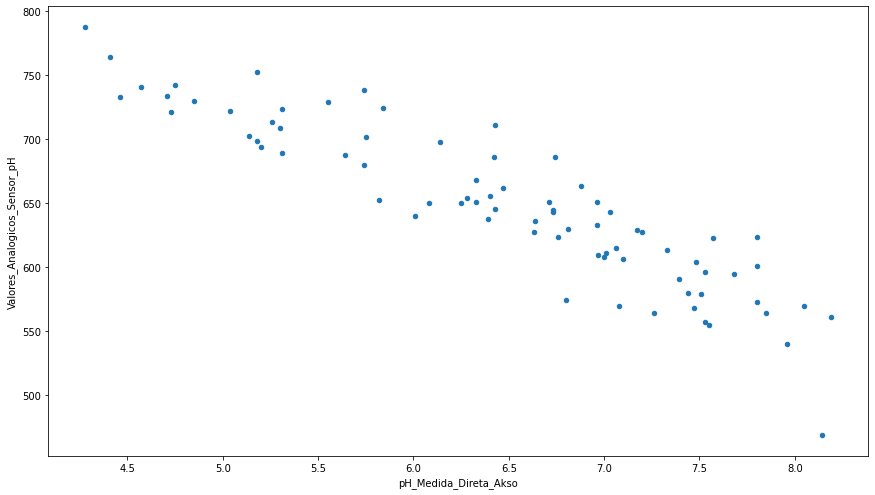

In [114]:
df.plot.scatter(x='pH_Medida_Direta_Akso',y='Valores_Analogicos_Sensor_pH');


In [115]:
#Calculando o teste de correlação de Pearson entre pH medição direta x Valores analogicos do sensor 
corr = np.corrcoef(df['pH_Medida_Direta_Akso'], df['Valores_Analogicos_Sensor_pH'])
print(corr)


[[ 1.         -0.91148251]
 [-0.91148251  1.        ]]


#correlação pH medição direta no solo x pH meio aquoso

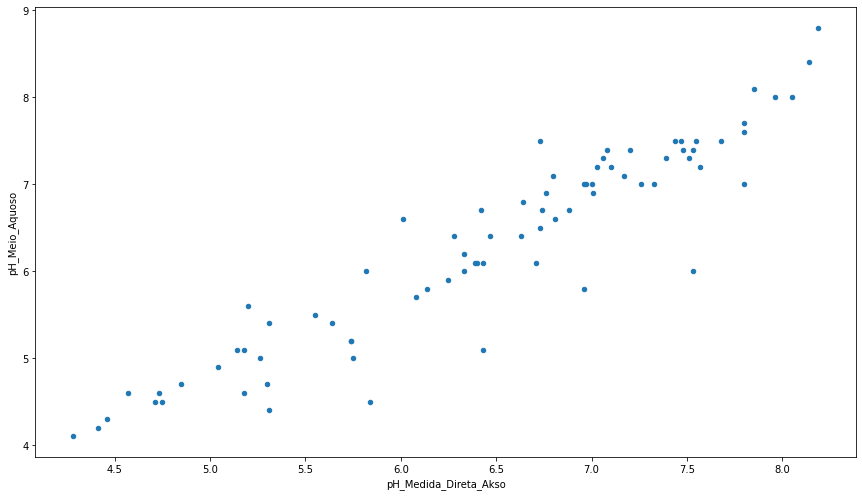

In [116]:
df.plot.scatter(x='pH_Medida_Direta_Akso',y='pH_Meio_Aquoso');


In [117]:
#Calculando o teste de correlação de Pearson entre pH medição direta x pH medição em meio aquoso 
corr = np.corrcoef(df['pH_Medida_Direta_Akso'], df['pH_Meio_Aquoso'])
print(corr)

[[1.         0.93749018]
 [0.93749018 1.        ]]


#Correlação Spearman 
correlação de Spearman avalia a relação monótona (linear e não linear) entre duas variáveis.
Teste não paramétrico.
mede relação de força entre duas variáveis.


In [118]:
my_r = df.corr(method="spearman")
print(my_r)

                              pH_Meio_Aquoso  pH_Medida_Direta_Akso  \
pH_Meio_Aquoso                      1.000000               0.929007   
pH_Medida_Direta_Akso               0.929007               1.000000   
Valores_Analogicos_Sensor_pH       -0.910509              -0.925010   

                              Valores_Analogicos_Sensor_pH  
pH_Meio_Aquoso                                   -0.910509  
pH_Medida_Direta_Akso                            -0.925010  
Valores_Analogicos_Sensor_pH                      1.000000  


In [119]:
def display_correlation(discorr):
    r = discorr.corr(method="spearman")
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(discorr.corr(), vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Spearman Correlation")
    return(r)

In [120]:
import numpy as np
import pandas as pd
import seaborn as sns # For pairplots and heatmaps
import matplotlib.pyplot as plt


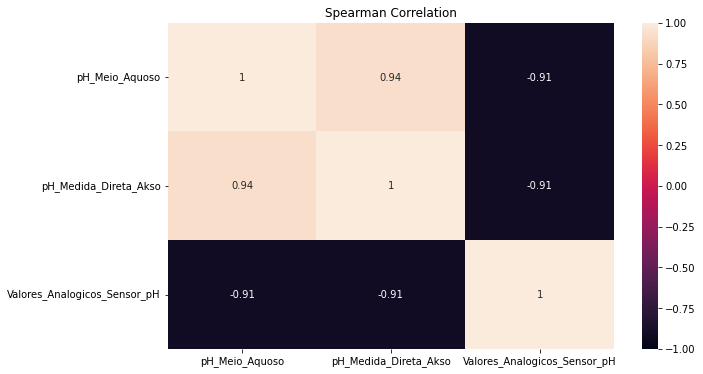

In [121]:
r_simple=display_correlation(df)

#Correlação de Kendall
mede a associação ordinal entre duas variáveis(não paramétrica)
Teste não paramétrico usado para numero pequeno de amostras ou populações grandes com grandes quantidades de empates(valores repetidos).


In [122]:
import pandas as pd
from pylab import rcParams
import seaborn as sb
from scipy.stats.stats import kendalltau


In [123]:
corr = df.corr(method='kendall')

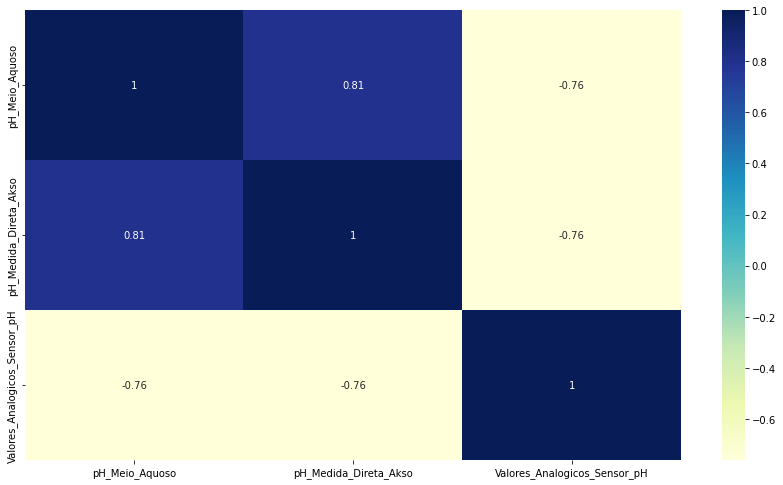

In [124]:
rcParams['figure.figsize'] = 14.7,8.27
sb.heatmap(corr, 
           xticklabels=corr.columns.values, 
           yticklabels=corr.columns.values, 
           cmap="YlGnBu",
          annot=True)

#Remoção de valores atípicos
trata os outliers que detectamos usando o Boxplot
Usando IQR, podemos seguir a abordagem abaixo para substituir os valores discrepantes por um valor NULL:

Calcule o primeiro e o terceiro quartil (Q1 e Q3).

Além disso, avalie o intervalo interquartil, IQR = Q3-Q1.

Estime o limite inferior, o limite inferior = Q1*1,5.
Estime o limite superior, limite superior = Q3*1,5.

Substitua os pontos de dados que estão fora do limite inferior e superior por um valor NULL.

In [125]:
for x in ['Valores_Analogicos_Sensor_pH']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan
    

    

Assim, usamos numpy.percentile() methodpara calcular os valores de Q1 e Q3. Além disso, substituímos os valores discrepantes por numpy.nanvalores NULL.

Tendo substituído os outliers por nan, vamos agora verificar a soma dos valores nulos ou valores ausentes usando o código abaixo:

In [126]:
df.isnull().sum()

pH_Meio_Aquoso                  0
pH_Medida_Direta_Akso           0
Valores_Analogicos_Sensor_pH    1
dtype: int64

In [127]:
#descarte de outleires
df = df.dropna(axis = 0)

In [128]:
df.isnull().sum()

pH_Meio_Aquoso                  0
pH_Medida_Direta_Akso           0
Valores_Analogicos_Sensor_pH    0
dtype: int64

#Regressão Linear

##pH meio aquoso x valores analogicos sensor pH


**Regressão Linear com Anova**

 teste entre pH meio aquoso e Valores analogicos sensor de pH

H0 -> Não há nenhuma associação entre o termo e a resposta (pH_Meio_Aquoso).

H1 -> Há uma associação entre o termo e a resposta (pH_Meio_Aquoso).

Valor-p ≤ α: a associação é estatisticamente significativa Se o valor-p for menor ou igual ao nível de significância, é possível concluir que há uma associação estatisticamente significativa entre a variável de resposta e o termo.

Valor-p > α: a associação não é estatisticamente significativa Se o valor-p for maior ou igual ao nível de significância, não é possível concluir que há uma associação estatisticamente significativa entre a variável de resposta e o termo. Talvez seja necessário reajustar o modelo sem o termo.

In [188]:
#Regressão Linear com Anova
import statsmodels.api as sm
from statsmodels.formula.api import ols
regressao1 = ols('pH_Meio_Aquoso~Valores_Analogicos_Sensor_pH', data=df).fit() #relação da variável de entrada e verificar sua influência sobre a variável de destino. 
anova_table = sm.stats.anova_lm(regressao1, typ=2)#aplicou anova no modelo
print(anova_table)

                                 sum_sq    df           F        PR(>F)
Valores_Analogicos_Sensor_pH  82.780437   1.0  385.422198  2.798457e-31
Residual                      16.108394  75.0         NaN           NaN


In [189]:
print(f"Overall model F({regressao1.df_model: .0f},{regressao1.df_resid: .0f}) = {regressao1.fvalue: .3f}, p = {regressao1.f_pvalue: .4f}")
print(regressao1.summary())

Overall model F( 1, 75) =  385.422, p =  0.0000
                            OLS Regression Results                            
Dep. Variable:         pH_Meio_Aquoso   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     385.4
Date:                Thu, 14 Apr 2022   Prob (F-statistic):           2.80e-31
Time:                        02:07:39   Log-Likelihood:                -49.026
No. Observations:                  77   AIC:                             102.1
Df Residuals:                      75   BIC:                             106.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

**Validação do Modelo de Regressão Linear com Anova**

**Analise dos Residuos**

In [192]:
# listagem de residuos(distancia que o ponto está da reta)
residuos = regressao1.resid
residuos

0    -0.103450
1    -0.474494
2    -0.140774
3    -0.078818
4    -0.261441
        ...   
73    1.118305
74    0.007167
75   -0.231761
76   -0.168978
77   -0.777189
Length: 77, dtype: float64

**Teste de normalidade dos resíduos** 

H0 = distribuição normal: p>0.05

Ha = distribuição não normal: p<=0.05

In [193]:
estatistica, p= stats.shapiro(residuos)
print('Estatística de Teste: {}' .format(estatistica))
print('p-valor: {}'.format(p))


Estatística de Teste: 0.9745129346847534
p-valor: 0.12417738884687424


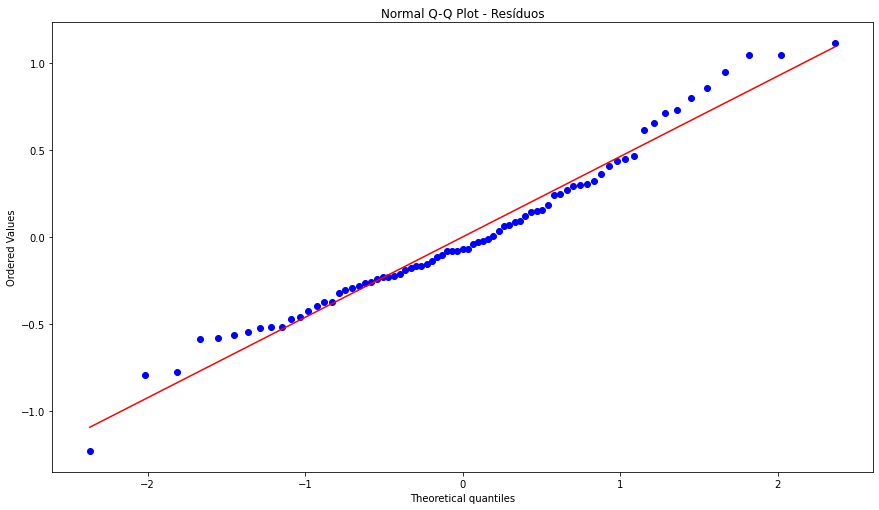

In [200]:
#Q-Q plot
stats.probplot(residuos, dist='norm', plot=plt)
plt.title('Normal Q-Q Plot - Resíduos')
plt.show()

**Analise de Homocedasticidade dos resíduos** 

Saber se os resíduos são homogeneos

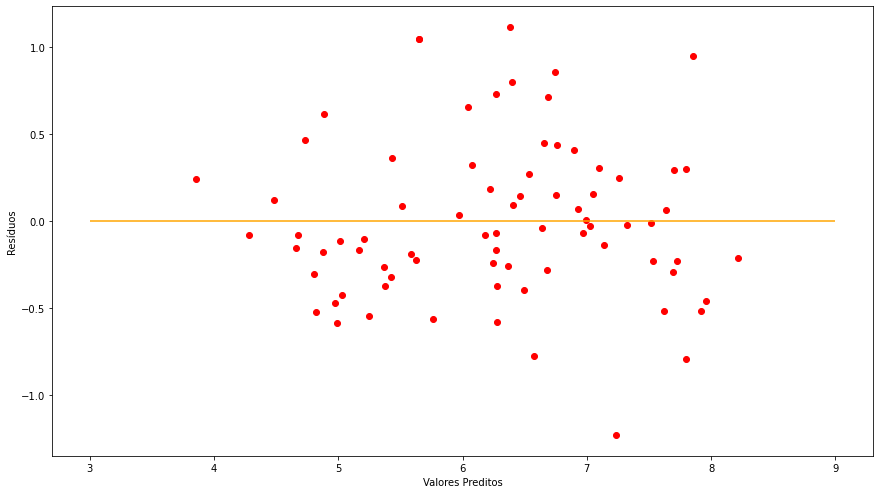

In [203]:
plt.scatter(y=residuos ,x=regressao1.predict(), color='red')
plt.hlines(y=0, xmin=3, xmax=9, color='orange')
plt.ylabel('Resíduos')
plt.xlabel('Valores Preditos')
plt.show()

Teste Breusch-Pagan(Homocedastiscidade ou Heterocedastiscidade)

Ho = Existe Homocedastiscidade: p> 0.05
Ha = Não existe Homocedastiscidade: p<= 0.05

In [204]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [205]:
estatistica, p, f, fp=sms.het_breuschpagan(regressao1.resid, regressao1.model.exog)
print('Estatistica do teste: {}' .format(estatistica))
print('p-valor: {}' .format(p))
print('f-valor: {}' .format(f))
print('f_p-valor: {}' .format(fp))

Estatistica do teste: 0.5654350955185468
p-valor: 0.4520786113997123
f-valor: 0.5548227064141307
f_p-valor: 0.4586815726112079


p-valor = 0.45. então p>0.05. significa que tem Homocedastiscidade.

**Outleires nos resíduos** 

(Entre -3 e 3)



In [208]:
outliers= regressao1.outlier_test()

In [209]:
outliers.max()

student_resid    2.513714
unadj_p          0.987665
bonf(p)          1.000000
dtype: float64

In [210]:
outliers.min()

student_resid   -2.817829
unadj_p          0.006197
bonf(p)          0.477189
dtype: float64

Portanto o modelo passou no teste de Normalidade, Homocedasticidade e Outleires de Resíduos, portanto o modelo é aprovado.

In [211]:
print(regressao1.summary())

                            OLS Regression Results                            
Dep. Variable:         pH_Meio_Aquoso   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     385.4
Date:                Thu, 14 Apr 2022   Prob (F-statistic):           2.80e-31
Time:                        02:54:27   Log-Likelihood:                -49.026
No. Observations:                  77   AIC:                             102.1
Df Residuals:                      75   BIC:                             106.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [212]:
#coeficientes
import pandas as pd
coefs = pd.DataFrame(regressao1.params)
coefs.columns = ['Coeficientes']
print(coefs)

                              Coeficientes
Intercept                        17.725605
Valores_Analogicos_Sensor_pH     -0.017612


Equação(Regressão Linear com Anova): pH(meio aquoso) = 17.7256 - 0.0176*Valores_Analogicos_Sensor_pH

In [213]:
df.head()

,pH_Meio_Aquoso,pH_Medida_Direta_Akso,Valores_Analogicos_Sensor_pH
0,5.1,6.43,711.00
1,4.5,5.84,724.00
2,7.0,7.80,601.00
3,4.2,4.41,763.50
4,6.1,6.43,645.25


In [214]:
#previsões usando modelo e equação gerada  pH(meio aquoso) = 17.7256 - 0.0176*Valores_Analogicos_Sensor_pH
regressao1.predict()

array([5.20345012, 4.97449371, 7.14077358, 4.27881847, 6.36144119,
       5.62613888, 5.76351272, 6.24255998, 5.43540058, 7.72901544,
       4.67949218, 6.26897803, 5.16822606, 7.79946356, 7.09674351,
       7.32217751, 4.98858334, 6.5313973 , 5.58739241, 5.36548081,
       6.07524568, 5.96781229, 5.01676259, 5.2474802 , 5.42360052,
       6.65292031, 6.74274167, 5.51342188, 5.02732981, 6.26897803,
       6.40106826, 6.04354402, 5.37428683, 5.65079572, 7.69379137,
       7.62070144, 6.45918797, 8.21510751, 6.40811308, 7.79594116,
       6.21790314, 4.88643355, 4.65747715, 5.65079572, 6.18091787,
       7.96149425, 4.80365701, 6.68638317, 6.96905628, 6.49617323,
       7.51414865, 3.85612971, 6.75154769, 6.68286077, 7.23411735,
       4.87938874, 4.82303024, 7.85229966, 7.70435859, 6.64059189,
       7.04566861, 6.76211491, 6.92942921, 7.25525179, 7.63919408,
       6.28042585, 4.48135683, 6.27531836, 4.73144768, 7.91570297,
       7.02629538, 6.89420514, 6.38169503, 6.99283252, 7.53176

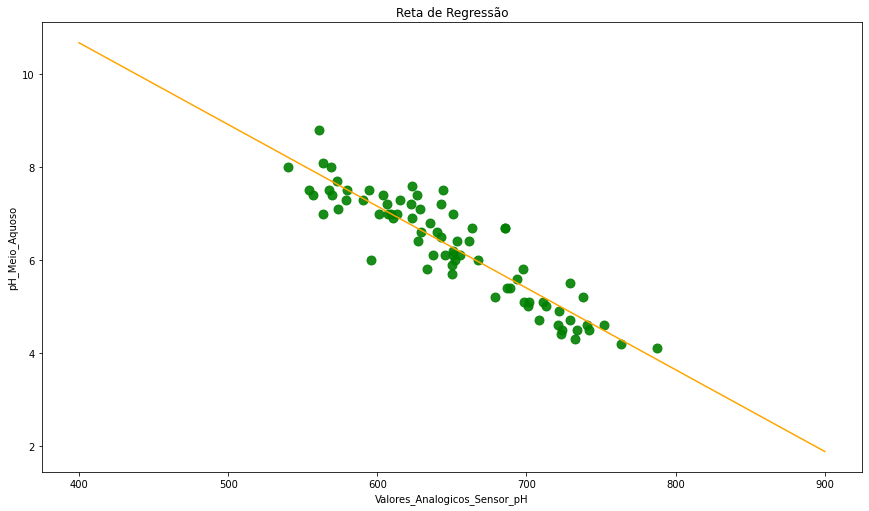

In [253]:
plt.scatter(y= df.pH_Meio_Aquoso, x=df.Valores_Analogicos_Sensor_pH ,color='green', s=80, alpha=0.9)
X_plot = np.linspace(400, 900)
plt.plot(X_plot, X_plot*regressao1.params[1] + regressao1.params[0], color='orange')
plt.title('Reta de Regressão')
plt.ylabel('pH_Meio_Aquoso')
plt.xlabel('Valores_Analogicos_Sensor_pH')
plt.show()



##pH medição direta x valores analogicos sensor pH
**Regressão Linear com Anova**

teste entre pH medição direta  e Valores analogicos sensor de pH

H0 -> Não há nenhuma associação entre o termo e a resposta (pH_Meio_Aquoso).

H1 -> Há uma associação entre o termo e a resposta (pH_Meio_Aquoso).

Valor-p ≤ α: a associação é estatisticamente significativa Se o valor-p for menor ou igual ao nível de significância, é possível concluir que há uma associação estatisticamente significativa entre a variável de resposta e o termo.

Valor-p > α: a associação não é estatisticamente significativa Se o valor-p for maior ou igual ao nível de significância, não é possível concluir que há uma associação estatisticamente significativa entre a variável de resposta e o termo. Talvez seja necessário reajustar o modelo sem o termo.

In [235]:
#Regressão Linear com Anova
import statsmodels.api as sm
from statsmodels.formula.api import ols
regressao2 = ols('pH_Medida_Direta_Akso~Valores_Analogicos_Sensor_pH', data=df).fit() #relação da variável de entrada e verificar sua influência sobre a variável de destino. 
anova_table = sm.stats.anova_lm(regressao2, typ=2)#aplicou anova no modelo
print(anova_table)

                                sum_sq    df           F        PR(>F)
Valores_Analogicos_Sensor_pH  66.31202   1.0  393.858555  1.414077e-31
Residual                      12.62738  75.0         NaN           NaN


In [236]:
print(f"Overall model F({regressao2.df_model: .0f},{regressao2.df_resid: .0f}) = {regressao2.fvalue: .3f}, p = {regressao2.f_pvalue: .4f}")
print(regressao2.summary())

Overall model F( 1, 75) =  393.859, p =  0.0000
                              OLS Regression Results                             
Dep. Variable:     pH_Medida_Direta_Akso   R-squared:                       0.840
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     393.9
Date:                   Thu, 14 Apr 2022   Prob (F-statistic):           1.41e-31
Time:                           03:31:22   Log-Likelihood:                -39.653
No. Observations:                     77   AIC:                             83.31
Df Residuals:                         75   BIC:                             87.99
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

**Validação do Modelo de Regressão Linear com Anova**

**Analise dos Residuos**

In [239]:
# listagem de residuos(distancia que o ponto está da reta)
residuos2 = regressao2.resid
residuos2

0     0.942374
1     0.557294
2     0.578433
3    -0.250063
4    -0.094050
        ...   
73    0.187822
74   -0.119157
75   -0.061508
76    0.268706
77    0.242852
Length: 77, dtype: float64

**Teste de normalidade dos resíduos** 

H0 = distribuição normal: p>0.05

Ha = distribuição não normal: p<=0.05

In [240]:
estatistica, p= stats.shapiro(residuos2)
print('Estatística de Teste: {}' .format(estatistica))
print('p-valor: {}'.format(p))

Estatística de Teste: 0.9846802353858948
p-valor: 0.48347944021224976


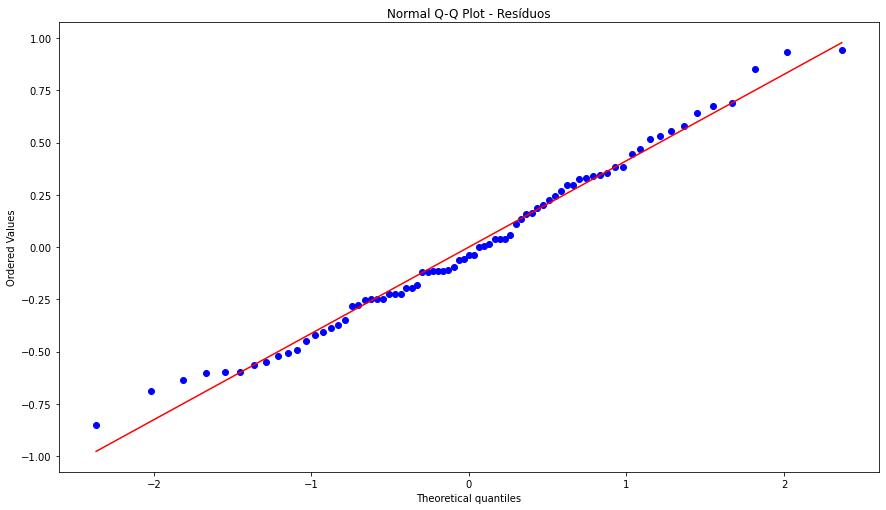

In [241]:
#Q-Q plot
stats.probplot(residuos2, dist='norm', plot=plt)
plt.title('Normal Q-Q Plot - Resíduos')
plt.show()

**Analise de Homocedasticidade dos resíduos** 

Saber se os resíduos são homogeneos

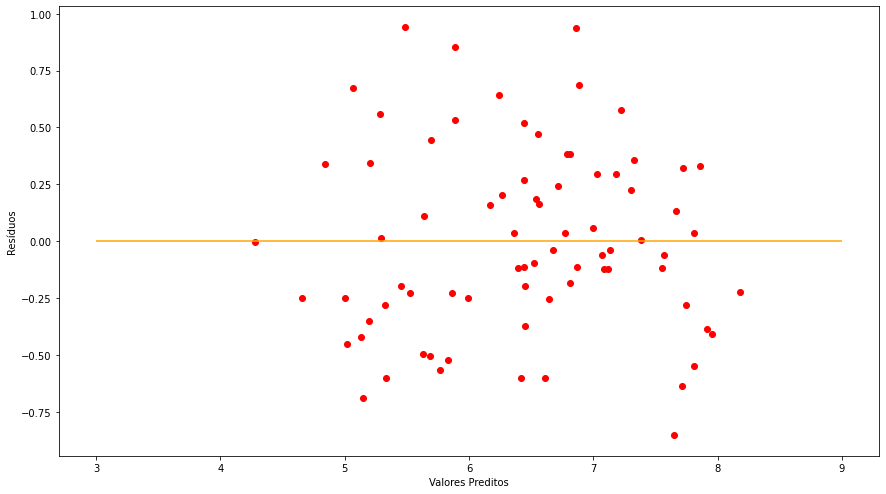

In [242]:
plt.scatter(y=residuos2 ,x=regressao2.predict(), color='red')
plt.hlines(y=0, xmin=3, xmax=9, color='orange')
plt.ylabel('Resíduos')
plt.xlabel('Valores Preditos')
plt.show()

Teste Breusch-Pagan(Homocedastiscidade ou Heterocedastiscidade)

Ho = Existe Homocedastiscidade: p> 0.05 Ha = Não existe Homocedastiscidade: p<= 0.05

In [243]:
estatistica, p, f, fp=sms.het_breuschpagan(regressao2.resid, regressao2.model.exog)
print('Estatistica do teste: {}' .format(estatistica))
print('p-valor: {}' .format(p))
print('f-valor: {}' .format(f))
print('f_p-valor: {}' .format(fp))

Estatistica do teste: 1.0493224382547832
p-valor: 0.3056631870189509
f-valor: 1.0361880288049996
f_p-valor: 0.3119822033799199


p-valor = 0.45. então p>0.05. significa que tem Homocedastiscidade

**Outleires nos resíduos** 

(Entre -3 e 3)

In [244]:
outliers2= regressao2.outlier_test()

In [245]:
outliers2.max()

student_resid    2.400696
unadj_p          0.996484
bonf(p)          1.000000
dtype: float64

In [246]:
outliers.min()

student_resid   -2.817829
unadj_p          0.006197
bonf(p)          0.477189
dtype: float64

Portanto o modelo passou no teste de Normalidade, Homocedasticidade e Outleires de Resíduos, portanto o modelo é aprovado

In [248]:
print(regressao2.summary())

                              OLS Regression Results                             
Dep. Variable:     pH_Medida_Direta_Akso   R-squared:                       0.840
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     393.9
Date:                   Thu, 14 Apr 2022   Prob (F-statistic):           1.41e-31
Time:                           03:41:22   Log-Likelihood:                -39.653
No. Observations:                     77   AIC:                             83.31
Df Residuals:                         75   BIC:                             87.99
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

In [250]:
#coeficientes
import pandas as pd
coefs = pd.DataFrame(regressao2.params)
coefs.columns = ['Coeficientes']
print(coefs)

                              Coeficientes
Intercept                        16.695193
Valores_Analogicos_Sensor_pH     -0.015763


Equação(Regressão Linear com Anova): pH_Medida_Direta_Akso = 16.695 -0.015763*Valores_Analogicos_Sensor_pH

In [251]:
#previsões usando modelo e equação gerada  pH(meio aquoso) = 17.7256 - 0.0176*Valores_Analogicos_Sensor_pH
regressao2.predict()

array([5.48762604, 5.2827057 , 7.22156742, 4.66006311, 6.5240501 ,
       5.86594053, 5.98889273, 6.41764915, 5.69522612, 7.74805508,
       5.01867372, 6.4412938 , 5.45609984, 7.81110749, 7.18215967,
       7.38392739, 5.29531618, 6.67616404, 5.8312617 , 5.6326466 ,
       6.26789966, 6.17174473, 5.32053715, 5.5270338 , 5.68466484,
       6.78492946, 6.86532129, 5.76505666, 5.32999501, 6.4412938 ,
       6.55951708, 6.23952608, 5.64052815, 5.88800887, 7.71652887,
       7.65111199, 6.61153532, 8.18311674, 6.56582232, 7.80795487,
       6.3955808 , 5.20389018, 4.99896984, 5.88800887, 6.36247829,
       7.95612805, 5.12980359, 6.81487935, 7.06787717, 6.64463784,
       7.55574522, 4.28174863, 6.87320284, 6.81172673, 7.30511187,
       5.19758494, 5.14714301, 7.8583968 , 7.72598674, 6.77389529,
       7.13644667, 6.8826607 , 7.03241018, 7.3240276 , 7.66766325,
       6.45153982, 4.8413388 , 6.44696852, 5.06517487, 7.91514398,
       7.11910725, 7.00088398, 6.54217766, 7.08915736, 7.57150

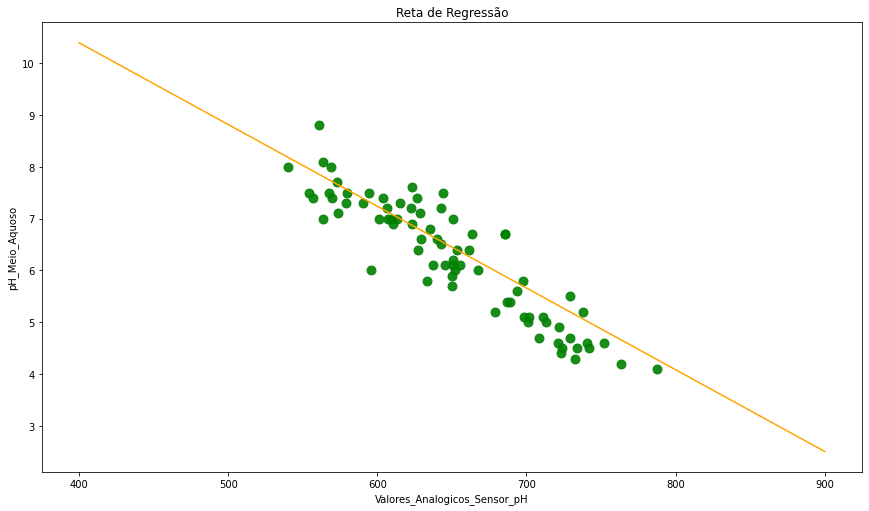

In [252]:
plt.scatter(y= df.pH_Meio_Aquoso, x=df.Valores_Analogicos_Sensor_pH ,color='green', s=80, alpha=0.9)
X_plot = np.linspace(400, 900)
plt.plot(X_plot, X_plot*regressao2.params[1] + regressao2.params[0], color='orange')
plt.title('Reta de Regressão')
plt.ylabel('pH_Meio_Aquoso')
plt.xlabel('Valores_Analogicos_Sensor_pH')
plt.show()